In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)

# Початкові умови

In [ ]:
f1 = np.vectorize(lambda x: 0.8*np.exp(-2*(x-3)**2))
f1_ = np.vectorize(lambda x: 0.2)
f2 = np.vectorize(lambda x: 10-6*x + x**2)
f2_ = np.vectorize(lambda x: 1)
xlim = [1, 5]

x = np.arange(*xlim, 0.01)

### Побудова графіка функції
Аналітичний розв'язок (заданої вище) системи нерівностей $0,8\exp(-2(x-3)^2) \le 0.2; 10-6x+x^2 \ge 1$ показує, що шукана множина Парето лежить в інтервалі $x \in [1; 3-\sqrt{\ln(2)}] \cup [\sqrt{\ln(2)}+3; 5]$.

In [ ]:
plim = [1, 2.167]  # з точністю 0.001
plim1 = [3.833, 5]
pareto = x[np.logical_or(x <= plim[1], x >= plim1[0])]
pareto

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  , 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09,
       2.1 , 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 3.84, 3.85, 3.86, 3.87,
       3.88, 3.89, 3.9 , 3.91, 3.92, 3.93, 3.94, 3.95, 3.96, 3.97, 3.98,
       3.99, 4.  , 4.01, 4.02, 4.03, 4.04, 4.05, 4.06, 4.07, 4.08, 4.09,
       4.1 , 4.11, 4.12, 4.13, 4.14, 4.15, 4.16, 4.

На графіку функції це має наступний вигляд:

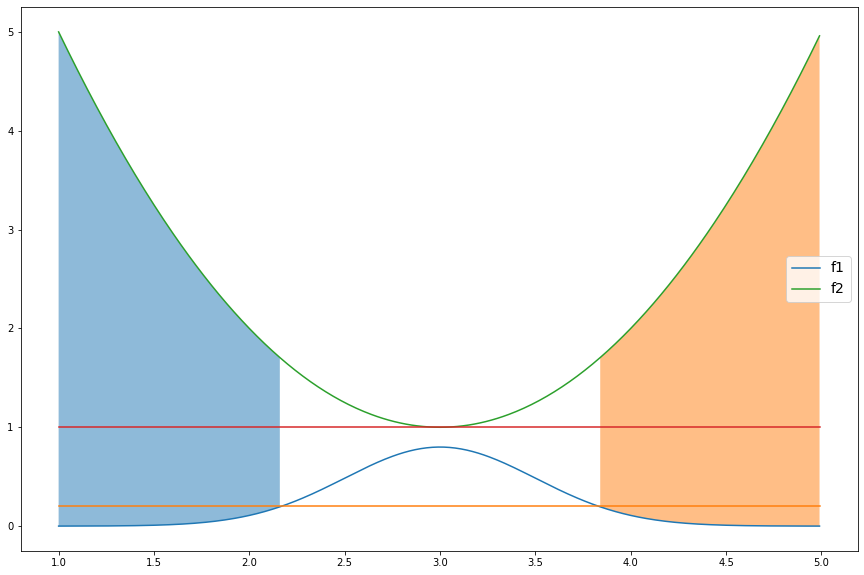

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, f1(x), label='f1')
ax.plot(x, f1_(x))
ax.plot(x, f2(x), label='f2')
ax.plot(x, f2_(x))

p1 = pareto[pareto <= 3]
p2 = pareto[pareto >= 3]
plt.fill_between(p1, f1(p1), f2(p1), alpha=0.5)
plt.fill_between(p2, f1(p2), f2(p2), alpha=0.5)

plt.legend(prop={'size': 14})
plt.show()

In [ ]:
fig.savefig('pareto.png')

# Метод технічних обмежень

При заданих точності e = 0.0001 та кроку сітки s = 0.001

In [ ]:
e = 4  # знаків після коми
s = 1e-3


def safe_arange(start, stop, step):
    return step * np.arange(start / step, stop / step)


x = safe_arange(*xlim, s)
x = x[np.logical_or(x <= plim[1]+0.001, x >= plim1[0])]

f1_t = np.vectorize(lambda x: round(f1(x)/f1_(x), e))
f2_t = np.vectorize(lambda x: round(f2(x)/f2_(x), e))

Нижче описані дві процедури технічних обмежень: максимінна та мінімаксна оптимізація на множині Парето. \
Максимінна:
$$
F_1(x) = \min_{i \in [1, m]} \dfrac{f_i(x)}{f_i^*} \\
F_1(x^0) = \max_{x \in D} F_1(x)
$$
І аналогічно мінімаксна:
$$
F_2(x) = \max_{i \in [1, m]} \dfrac{f_i(x)}{f_i^*} \\
F_2(x^0) = \min_{x \in D} F_2(x)
$$

In [ ]:
def maxmin(*f_result):
  stacked = np.column_stack(f_result)
  min_ = np.amin(stacked, axis=1)
  return np.amax(min_), np.argwhere(min_ == np.amax(min_)).flatten(), stacked, min_


def minmax(*f_result):
  stacked = np.column_stack(f_result)
  max_ = np.amax(stacked, axis=1)
  return np.amin(max_), np.argwhere(max_ == np.amin(max_)).flatten(), stacked, max_

In [ ]:
results = [f1_t(x), f2_t(x)]
maxmin_r, maxmin_idx, *maxmin_cl = maxmin(*results)
print(f'Maxmin result: {maxmin_r}, {maxmin_idx}')

Maxmin result: 0.9985, [1167 1168]


In [ ]:
minmax_r, minmax_idx, *minmax_cl = minmax(*results)
print(f'Minmax result: {minmax_r}, {minmax_idx}')

Minmax result: 1.6939, [1167 1168]


Для наглядності побудуємо таблицю

In [ ]:
filler = pd.Series('-', index=range(len(x)))
data = {
    'x': x, 
    'f1/f1*': minmax_cl[0][:, 0],
    'f2/f2*': minmax_cl[0][:, 1],
    'max(f/f*)': minmax_cl[1],
    'min max(f/f*)': filler.copy(),
    'min(f/f*)': maxmin_cl[1],
    'max min(f/f*)': filler.copy()
}

df = pd.DataFrame(data)
df.loc[minmax_idx, 'min max(f/f*)'] = minmax_r
df.loc[maxmin_idx, 'max min(f/f*)'] = maxmin_r

df[minmax_idx[0]-5:minmax_idx[0]+5]

,x,f1/f1*,f2/f2*,max(f/f*),min max(f/f*),min(f/f*),max min(f/f*)
1162,2.162,0.9820,1.7022,1.7022,-,0.9820,-
1163,2.163,0.9853,1.7006,1.7006,-,0.9853,-
1164,2.164,0.9886,1.6989,1.6989,-,0.9886,-
1165,2.165,0.9919,1.6972,1.6972,-,0.9919,-
1166,2.166,0.9952,1.6956,1.6956,-,0.9952,-
1167,2.167,0.9985,1.6939,1.6939,1.6939,0.9985,0.9985
1168,3.833,0.9985,1.6939,1.6939,1.6939,0.9985,0.9985
1169,3.834,0.9952,1.6956,1.6956,-,0.9952,-
1170,3.835,0.9919,1.6972,1.6972,-,0.9919,-
1171,3.836,0.9886,1.6989,1.6989,-,0.9886,-


Як і очікувалось з графіка, для двох досліджуваних функцій раціональним компромісом слід обрати стратегію x=3.833 або x=2.167

In [ ]:
!pip install dataframe_image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 12.5 MB/s eta 0:00:00


In [ ]:
# [Google Colab only] fix OSError: Chrome executable not able to be found on your machine
# https://github.com/dexplo/dataframe_image/issues/15
!wget -q https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb -O google-chrome-stable_current_amd64.deb 
!apt-get install -y -qq ./google-chrome-stable_current_amd64.deb

Selecting previously unselected package libu2f-udev.
(Reading database ... 128126 files and directories currently installed.)
Preparing to unpack .../libu2f-udev_1.1.10-1_all.deb ...
Unpacking libu2f-udev (1.1.10-1) ...
Selecting previously unselected package google-chrome-stable.
Preparing to unpack .../google-chrome-stable_current_amd64.deb ...
Unpacking google-chrome-stable (110.0.5481.100-1) ...
Setting up libu2f-udev (1.1.10-1) ...
Failed to send reload request: No such file or directory
Setting up google-chrome-stable (110.0.5481.100-1) ...
update-alternatives: using /usr/bin/google-chrome-stable to provide /usr/bin/x-www-browser (x-www-browser) in auto mode
update-alternatives: using /usr/bin/google-chrome-stable to provide /usr/bin/gnome-www-browser (gnome-www-browser) in auto mode
update-alternatives: using /usr/bin/google-chrome-stable to provide /usr/bin/google-chrome (google-chrome) in auto mode
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for mime-suppo

In [ ]:
import dataframe_image as dfi

df_styled = df[minmax_idx[0]-5:minmax_idx[0]+5].style.background_gradient(subset=['max(f/f*)', 'min(f/f*)'])
dfi.export(df_styled,"pareto_table.png")